In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
dataset1=pd.read_csv("PAML_COVID_Dataset for classification.csv")

In [72]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3135 entries, 0 to 3134
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   3135 non-null   int64 
 1   Serious symptoms      3135 non-null   object
 2   Less common symptoms  3135 non-null   object
 3   Most common symptoms  3135 non-null   object
 4   Severity              3135 non-null   object
 5   Patient_Status        3135 non-null   object
dtypes: int64(1), object(5)
memory usage: 147.1+ KB


In [20]:
col1=dataset1['Age ']
col2=dataset1['Serious symptoms']
col2=col2.replace(['difficulty breathing or shortness of breath','loss of speech or movement','chest pain or pressure'],[0,1,2])
dataset2=pd.concat([col1, col2], axis=1)

In [29]:
col3=dataset1['Most common symptoms']
col3=col3.replace(['tiredness','dry cough','fever'],[0,1,2])
dataset2=pd.concat([col1, col2,col3], axis=1)

In [32]:
col4=dataset1['Less common symptoms']
col4=col4.replace(['diarrhoea','sore throat','loss of taste or smell','headache','conjunctivitis','a rash on skin, or discolouration of fingers or toes','aches and pains'],[0,1,2,3,4,5,6])
dataset2=pd.concat([col1, col2,col3,col4], axis=1)

In [39]:
col5=dataset1['Severity']
col5=col5.replace(['Seviour','Moderate','Mild'],[0,1,2])
col6=dataset1['Patient_Status ']
col6=col6.replace(['flu','Covid'],[0,1])

dataset2=pd.concat([col1,col2,col3,col4,col5,col6], axis=1)

In [40]:
cormat1=dataset2.corr()

In [41]:
cormat1

,Age,Serious symptoms,Most common symptoms,Less common symptoms,Severity,Patient_Status
Age,1.000000,0.032288,-0.026937,-0.003174,-0.026161,-0.024359
Serious symptoms,0.032288,1.000000,-0.001910,0.007901,0.001776,-0.030145
Most common symptoms,-0.026937,-0.001910,1.000000,0.031858,0.010255,0.037924
Less common symptoms,-0.003174,0.007901,0.031858,1.000000,-0.033692,0.015294
Severity,-0.026161,0.001776,0.010255,-0.033692,1.000000,-0.007143
Patient_Status,-0.024359,-0.030145,0.037924,0.015294,-0.007143,1.000000


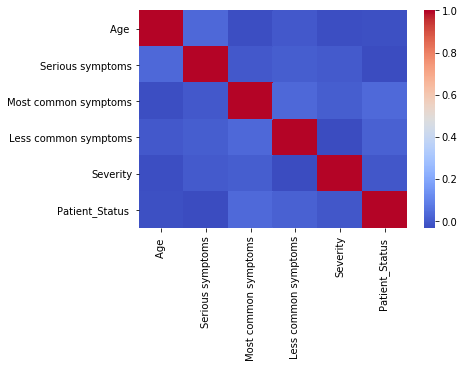

In [45]:
myheatmap=sns.heatmap(cormat1, cmap= 'coolwarm', linecolor='white')

In [46]:
figure=myheatmap.get_figure()

In [47]:
figure.savefig('myheatmap.png', dpi=400)

## Classifier

In [65]:
xx1=dataset2[['Age ','Serious symptoms', 'Less common symptoms', 'Most common symptoms', 'Severity']]

In [66]:
import numpy as geek
yy1=dataclass1[['Patient_Status ']]
yy1=yy1.to_numpy()
yy1=yy1.ravel()

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx1, yy1, random_state = 109) 

In [68]:
from sklearn import svm

#a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Prediction of the response for test dataset
y_pred = clf.predict(X_test)

In [69]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4987244897959184


In [70]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix 

dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

In [71]:
print('Accuracy= {}'.format(dtree_model.score(X_train,y_train)))

Accuracy= 0.5304125903870693
